# Information Retrieval Assignment 2

    Group 3: Sugam Budhraja (2016A7PS0064G), Mukul Jain (2016A7PS0046G), Shriya TP (2016A7PS0060G)

### Importing Libraries

In [1]:
import nltk
import os, sys
import random
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
bits_ids = [64, 46, 60]

## Task 1

In [3]:
corpora = os.listdir('../corpora')
len(corpora)

6377

In [4]:
def document_sampler(corpora, no_of_groups, no_of_samples):
    # Randomly selects given number
    corpora_size = len(corpora)
    groups = []
    group_size = math.ceil(corpora_size / no_of_groups)
    for i in range(0, corpora_size, group_size):
        groups.append(corpora[i:i + group_size])
    n = len(groups)
    sampled_corpora = []
    remaining = 1.5 * no_of_samples
    for group in groups:
        group_sample_size = math.ceil(remaining / n)
        sampled_corpora.extend(random.sample(group, group_sample_size))
        remaining -= group_sample_size
        n -= 1
    sampled_corpora = random.sample(sampled_corpora, no_of_samples)
    return sorted(sampled_corpora)

In [5]:
# Choosen same as Assignment 1
sampled_corpora = document_sampler(corpora, max(bits_ids), 500)
sampled_corpora = ['GX000-14-16748010', 'GX000-34-9679963', 'GX000-49-12224349', 'GX000-56-16493385', 'GX000-63-3636455', 'GX000-64-5866723', 'GX001-08-5834860', 'GX001-12-8380564', 'GX001-16-14126351', 'GX001-23-13679550', 'GX001-49-1759246', 'GX001-60-13661262', 'GX002-09-12860652', 'GX002-21-2749837', 'GX002-29-13068057', 'GX002-44-10720049', 'GX002-49-2717782', 'GX002-89-3295043', 'GX003-15-11693082', 'GX003-24-2094074', 'GX003-53-14433328', 'GX003-79-2665298', 'GX003-90-5300889', 'GX004-44-10049693', 'GX004-44-4958806', 'GX004-45-13410718', 'GX004-56-13614868', 'GX004-76-11859934', 'GX004-82-7551182', 'GX004-94-0630300', 'GX005-19-2223054', 'GX005-29-0821498', 'GX006-46-12583641', 'GX006-50-2080860', 'GX007-07-3099518', 'GX007-39-2116215', 'GX007-60-13341075', 'GX007-68-4405717', 'GX007-79-13292316', 'GX007-85-15421382', 'GX007-86-11212285', 'GX007-99-10718889', 'GX008-24-6611077', 'GX008-26-8860226', 'GX008-71-9359930', 'GX008-73-6765397', 'GX008-83-7595521', 'GX008-87-0169546', 'GX009-16-14839403', 'GX009-19-10005177', 'GX009-19-15950946', 'GX009-45-11723421', 'GX009-51-9507908', 'GX009-60-11892722', 'GX009-61-15418142', 'GX010-38-12838450', 'GX010-42-7125010', 'GX010-55-9999707', 'GX010-62-0367708', 'GX010-68-3391193', 'GX011-09-11087530', 'GX011-33-2690451', 'GX011-57-3181864', 'GX011-75-7860217', 'GX012-03-15711379', 'GX012-50-2664354', 'GX013-02-1888344', 'GX013-15-12990607', 'GX013-21-8101638', 'GX013-28-5831763', 'GX013-51-9369770', 'GX013-66-2159335', 'GX014-20-11137168', 'GX014-94-14193533', 'GX015-06-2467230', 'GX015-24-2044629', 'GX015-26-11060696', 'GX015-26-5522499', 'GX015-41-6877327', 'GX015-69-0996713', 'GX015-78-7759537', 'GX015-94-3379176', 'GX016-31-12013067', 'GX016-38-10313581', 'GX017-08-6496610', 'GX017-14-16445432', 'GX017-48-0392677', 'GX017-48-5823785', 'GX017-64-14169895', 'GX017-66-14467043', 'GX018-00-7821485', 'GX018-18-5887287', 'GX018-50-15597717', 'GX019-11-16299303', 'GX019-66-5691177', 'GX020-36-14224421', 'GX020-55-12765333', 'GX021-12-15606844', 'GX021-13-8007606', 'GX021-17-16045566', 'GX021-76-1305424', 'GX021-78-1046039', 'GX021-78-14111704', 'GX021-92-9299928', 'GX021-95-7246989', 'GX023-23-14296372', 'GX023-24-9535807', 'GX023-59-9587760', 'GX023-70-8025583', 'GX024-18-0566243', 'GX024-64-10288263', 'GX025-13-7170127', 'GX025-19-15369619', 'GX025-52-2425850', 'GX025-63-11761846', 'GX025-72-6112588', 'GX026-23-10309684', 'GX026-55-4495290', 'GX026-56-10685144', 'GX026-99-6890829', 'GX027-22-0802131', 'GX027-63-5437130', 'GX027-87-11737511', 'GX028-01-8133965', 'GX028-12-4849513', 'GX028-84-14233612', 'GX029-08-1029871', 'GX029-39-0098946', 'GX029-89-7943366', 'GX030-27-11447035', 'GX030-59-15904090', 'GX030-68-11624393', 'GX031-09-15928290', 'GX031-22-7020995', 'GX031-33-3572537', 'GX031-85-14725261', 'GX032-43-13795513', 'GX033-69-6901132', 'GX033-75-4680640', 'GX033-80-1485499', 'GX033-81-0973410', 'GX033-86-6195024', 'GX033-98-3591624', 'GX034-82-12192097', 'GX035-80-4193961', 'GX036-09-7233164', 'GX037-01-1938895', 'GX037-71-7540146', 'GX038-39-14263405', 'GX038-86-8989005', 'GX040-19-9146635', 'GX040-21-15865254', 'GX040-22-3951061', 'GX040-31-7496566', 'GX040-35-0275235', 'GX041-15-14430764', 'GX041-58-5623181', 'GX041-77-11294151', 'GX041-92-16403469', 'GX042-99-6897240', 'GX043-00-4548503', 'GX043-12-7151132', 'GX043-29-8515839', 'GX043-36-5117663', 'GX043-40-6494545', 'GX043-90-5066152', 'GX044-12-0880462', 'GX044-95-0750022', 'GX045-13-2185185', 'GX045-65-2045612', 'GX046-04-15949750', 'GX046-66-5664305', 'GX046-75-16145192', 'GX047-10-14781567', 'GX047-50-5708112', 'GX048-21-7001876', 'GX049-19-9024443', 'GX049-90-4762744', 'GX050-72-9324843', 'GX050-73-5195411', 'GX051-06-13610390', 'GX051-14-10672370', 'GX051-75-9864246', 'GX052-07-7757766', 'GX052-16-15580169', 'GX052-47-14203690', 'GX052-72-0976327', 'GX053-01-9208920', 'GX053-74-0025847', 'GX054-65-3680252', 'GX055-07-6092381', 'GX055-39-14112384', 'GX055-45-5836689', 'GX055-59-12790910', 'GX057-09-10899273', 'GX057-39-1550657', 'GX057-87-12773095', 'GX057-90-12193897', 'GX058-01-8981309', 'GX058-16-15816529', 'GX058-68-12935160', 'GX061-06-4170063', 'GX062-35-0543954', 'GX062-94-11686986', 'GX063-62-9718669', 'GX064-75-5382503', 'GX065-03-15338329', 'GX065-74-6760912', 'GX065-87-16342424', 'GX066-00-11616095', 'GX066-14-5089049', 'GX066-39-4190084', 'GX066-45-10029321', 'GX066-63-6271555', 'GX067-28-0048945', 'GX067-38-0106641', 'GX067-42-3625193', 'GX068-36-13498939', 'GX068-38-5829455', 'GX068-56-13834891', 'GX069-33-0919782', 'GX069-67-14003424', 'GX070-00-8833876', 'GX070-20-6909524', 'GX071-54-11080060', 'GX072-88-3657792', 'GX073-00-16664363', 'GX073-62-15963317', 'GX075-10-3489560', 'GX075-50-8481570', 'GX077-01-0254751', 'GX079-16-8498558', 'GX081-49-7859192', 'GX082-48-9500832', 'GX087-52-14122706', 'GX087-85-16146470', 'GX089-15-10211686', 'GX089-50-9947514', 'GX089-80-14831764', 'GX091-30-14229627', 'GX093-66-4143911', 'GX095-25-15266137', 'GX097-83-12508127', 'GX100-24-12616635', 'GX100-83-1667862', 'GX103-17-8074991', 'GX103-22-16286725', 'GX103-47-10938086', 'GX103-91-3728274', 'GX104-80-12831729', 'GX107-37-1949333', 'GX109-55-7135234', 'GX112-77-16023977', 'GX113-49-6539564', 'GX121-12-8346972', 'GX121-36-7586135', 'GX121-67-1644408', 'GX121-88-15410553', 'GX124-84-10598044', 'GX127-18-4612076', 'GX135-17-7376774', 'GX139-05-4049280', 'GX139-41-8651127', 'GX143-50-7683833', 'GX145-56-13803677', 'GX145-60-6379736', 'GX145-71-1172090', 'GX151-00-14199077', 'GX152-39-0092381', 'GX157-68-7618980', 'GX159-25-4000693', 'GX167-80-0836865', 'GX168-63-13162107', 'GX170-09-0269656', 'GX176-99-15692073', 'GX178-74-6172389', 'GX179-52-13684519', 'GX179-63-3362019', 'GX180-71-15515175', 'GX182-87-10030005', 'GX192-22-11531649', 'GX193-58-7756295', 'GX194-30-4734280', 'GX199-59-5010523', 'GX207-78-9757079', 'GX213-49-2715084', 'GX214-12-4173949', 'GX226-22-13141259', 'GX226-96-7682247', 'GX227-06-4883402', 'GX227-25-5358331', 'GX227-53-8692184', 'GX228-04-5375014', 'GX228-20-4909978', 'GX229-24-1392229', 'GX229-26-1193805', 'GX229-31-9751198', 'GX229-59-0774314', 'GX229-69-11032561', 'GX230-57-0826933', 'GX230-85-6655296', 'GX230-93-12442172', 'GX231-00-16516499', 'GX231-19-10516920', 'GX231-46-2838862', 'GX231-94-16162807', 'GX231-96-7129179', 'GX232-11-4389437', 'GX232-29-4108790', 'GX232-40-16347300', 'GX232-42-5263350', 'GX232-43-15916167', 'GX232-68-13705500', 'GX232-71-15597940', 'GX232-78-11859812', 'GX232-85-2201717', 'GX232-87-3639983', 'GX232-96-13853404', 'GX233-14-3653712', 'GX233-16-3595416', 'GX233-42-4224750', 'GX233-57-9641546', 'GX233-81-7848322', 'GX233-88-6274391', 'GX233-98-15553749', 'GX234-18-0071489', 'GX234-38-3676270', 'GX234-42-15117917', 'GX234-72-11028314', 'GX234-99-9192505', 'GX235-00-11952477', 'GX235-00-5849063', 'GX235-02-0124635', 'GX235-15-5867142', 'GX235-20-8549989', 'GX235-24-5369423', 'GX235-38-5142996', 'GX235-53-14138503', 'GX235-72-12549090', 'GX236-15-9321905', 'GX237-00-6109677', 'GX237-05-3800547', 'GX237-12-11280377', 'GX237-12-11943678', 'GX237-19-14749559', 'GX237-31-9949851', 'GX237-96-0759701', 'GX238-30-2755851', 'GX238-42-0467910', 'GX238-60-14205244', 'GX238-79-14696439', 'GX239-01-8714928', 'GX239-03-12845076', 'GX239-06-3563138', 'GX239-09-12904815', 'GX239-40-7244913', 'GX239-81-4505280', 'GX240-42-4362738', 'GX240-74-10452191', 'GX240-86-14098064', 'GX240-92-7416536', 'GX241-05-13783479', 'GX241-58-8773705', 'GX242-16-7138628', 'GX242-26-0267600', 'GX243-02-1414432', 'GX243-03-12376037', 'GX243-33-11641927', 'GX243-40-6330437', 'GX243-45-3575888', 'GX243-47-10501670', 'GX243-80-2392258', 'GX244-80-11396041', 'GX245-11-16374275', 'GX245-30-6841891', 'GX245-43-1916269', 'GX246-39-4116773', 'GX246-75-9197436', 'GX246-79-13977676', 'GX246-91-10294535', 'GX247-13-2996650', 'GX247-24-7579610', 'GX247-25-8818418', 'GX248-24-5294126', 'GX248-50-0830022', 'GX249-15-4141453', 'GX249-22-5161324', 'GX249-29-16459031', 'GX249-38-16329982', 'GX249-88-3493953', 'GX250-22-5854147', 'GX250-35-8835769', 'GX250-88-9308907', 'GX251-04-11151703', 'GX251-09-0718781', 'GX251-52-7467576', 'GX251-62-12973890', 'GX251-67-7606538', 'GX251-70-11344882', 'GX252-11-2526912', 'GX252-22-10978485', 'GX252-33-9545454', 'GX252-40-13276639', 'GX252-71-1086236', 'GX253-07-0509398', 'GX253-38-10355527', 'GX253-51-0239801', 'GX253-53-12970604', 'GX253-57-7230055', 'GX253-84-8473436', 'GX253-87-7676575', 'GX254-13-15832282', 'GX254-20-3756494', 'GX254-37-4792579', 'GX255-36-7766276', 'GX255-42-1094700', 'GX255-59-12399984', 'GX255-97-3591075', 'GX256-40-6950329', 'GX256-97-5102132', 'GX256-99-16682538', 'GX257-02-10481993', 'GX257-07-6883134', 'GX257-12-1025147', 'GX257-28-11106222', 'GX257-47-15921493', 'GX257-64-5408673', 'GX257-82-6194353', 'GX257-96-12326720', 'GX257-97-14914774', 'GX259-07-15168279', 'GX259-16-1156499', 'GX259-24-8636681', 'GX259-81-4318237', 'GX260-10-10573558', 'GX260-16-1955567', 'GX260-42-13043086', 'GX260-51-10165685', 'GX260-51-14512745', 'GX260-54-16069250', 'GX260-69-2588884', 'GX260-71-8228557', 'GX261-18-2187872', 'GX261-59-0396498', 'GX261-79-9451326', 'GX261-91-8156340', 'GX261-95-13413473', 'GX262-04-1959129', 'GX262-22-16536810', 'GX262-41-3547244', 'GX262-43-10150640', 'GX262-46-9997599', 'GX262-56-13887588', 'GX262-87-6686146', 'GX262-97-12126662', 'GX263-26-4104529', 'GX263-29-9742008', 'GX263-53-9904447', 'GX263-62-14010219', 'GX264-07-3700164', 'GX264-43-15047047', 'GX264-47-12111712', 'GX264-58-2764191', 'GX264-90-1119716', 'GX265-06-5380204', 'GX265-09-14730957', 'GX265-48-12124463', 'GX265-84-7041783', 'GX266-03-10955706', 'GX266-06-11290095', 'GX266-18-15123009', 'GX266-44-0976150', 'GX266-74-8427394', 'GX266-75-2283641', 'GX266-83-9773531', 'GX267-53-7097702', 'GX267-65-4682048', 'GX268-17-14826284', 'GX268-19-0890702', 'GX268-29-12847458', 'GX268-30-3012189', 'GX268-55-9791226', 'GX268-81-10971432', 'GX268-85-12940758', 'GX269-07-10913534', 'GX269-19-16539087', 'GX269-46-11796393', 'GX269-75-10623488', 'GX270-39-3274593', 'GX270-48-16500928', 'GX270-85-12054178', 'GX271-36-1182114', 'GX271-38-3971750', 'GX271-47-12319227', 'GX271-73-2310549', 'GX272-13-8411847', 'GX272-39-6943598', 'GX272-48-7729113', 'GX272-59-12178479', 'GX272-70-15018444']
print(len(sampled_corpora))

500


#### Tokenizing Text

In [6]:
corpus = []
doclist = []
for document in sampled_corpora:
    with open('corpora/' + document, encoding="utf8") as doc:
        text = doc.read()
        corpus.append(text)
        doclist.append(document)

In [7]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer("[a-zA-Z@]+")

#### Removing stopwords

In [8]:
from nltk.corpus import stopwords

sw = set(stopwords.words('english'))

def filter_words(word_list):
    useful_words = [w for w in word_list if w not in sw]
    return useful_words

In [9]:
def myTokenizer(sentence):
    words = tokenizer.tokenize(sentence.lower())
    return filter_words(words)  # Filter out the stopwords

#### Expressing document vectors in terms of raw term frequencies

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(tokenizer=myTokenizer)
vectorized_corpus = cv.fit_transform(corpus)
tf = vectorized_corpus.toarray()
print(tf[0])
print(len(tf), len(tf[0]))

[0 0 0 ... 0 0 0]
500 55441


#### Loading queries

In [11]:
queries = []
with open('query.txt',encoding="utf8") as queries_file:
    queries = queries_file.read().strip().split('\n')

In [12]:
def query_sampler(queries, no_of_groups, no_of_samples):
    no_of_queries = len(queries)
    groups = []
    group_size = math.ceil(no_of_queries / no_of_groups)
    for i in range(0, no_of_queries, group_size):
        groups.append(queries[i:i + group_size])
    n = len(groups)
    sampled_queries = []
    remaining = 2.5 * no_of_samples
    for group in groups:
        group_sample_size = math.ceil(remaining / n)
        sampled_queries.extend(random.sample(group, group_sample_size))
        remaining -= group_sample_size
        n -= 1
    sampled_queries = random.sample(sampled_queries, no_of_samples)
    return sorted(sampled_queries)

In [13]:
# Choosen same as Assignment 1
sampled_queries = query_sampler(queries, min(bits_ids), 10)
sampled_queries = ['706  methods control type ii diabetes',
 '708  sources slate stone decorative',
 '711  security measures employed train stations due heightened security concerns',
 '716  spammers arrested sued sending unsolicited e mail',
 '725  cause lowered white blood cell count',
 '738  examples anthrax hoaxes',
 '743  regulations considerations concerning registering freighter country',
 '746  jobs outsourced india',
 '760  statistics regarding american muslims mosques schools',
 '771  deformities found leopard frogs']
sampled_queries

['706  methods control type ii diabetes',
 '708  sources slate stone decorative',
 '711  security measures employed train stations due heightened security concerns',
 '716  spammers arrested sued sending unsolicited e mail',
 '725  cause lowered white blood cell count',
 '738  examples anthrax hoaxes',
 '743  regulations considerations concerning registering freighter country',
 '746  jobs outsourced india',
 '760  statistics regarding american muslims mosques schools',
 '771  deformities found leopard frogs']

#### Finding required results

In [14]:
required_results = {}
with open('output.txt') as op_file:
    results = op_file.read().strip().split('\n')
    for result in results:
        query_id, document = result.strip().split(' ')
        if query_id not in required_results:
            required_results[query_id] = []
        if document in sampled_corpora:
            required_results[query_id].append(document)

#### Reformatting queries

In [15]:
simple_queries = []
querylist = []
for query in sampled_queries:
    query_id, query_text = query.strip().split('  ')
    simple_queries.append(query_text)
    querylist.append(query_id)

In [16]:
vectorized_queries = cv.transform(simple_queries)
vq = vectorized_queries.toarray()
print(vq[0])
print(len(vq), len(vq[0]))

[0 0 0 ... 0 0 0]
10 55441


#### Evaluating model using precision and recall

In [17]:
def rank_documents(query, model):
    docscores = []
    for j in range(len(model)):
        docscores.append(sum(i[0] * i[1] for i in zip(query, model[j])))
    return [x for _,x in sorted(zip(docscores, doclist), reverse=True)]

In [18]:
def evaluate_results(actual, predicted):
    print("\nk \t Precision \t Recall")
    relevant = len(actual)
    retrieved = len(predicted)
    true_positive = 0
    for i in range(15):
        if i < retrieved and predicted[i] in actual:
            true_positive += 1
        if i%5==4:
            print(i + 1, '\t', "%.2f" % (true_positive / (i + 1)), '\t\t',"%.2f" % (true_positive / relevant))
    print()

In [19]:
def evaluate_model(vq, model):
    for i in range(len(vq)):
        print('Query',querylist[i],':', simple_queries[i])
        predicted_documents = rank_documents(vq[i], model)
        required_documents = required_results[querylist[i]]
        if len(required_documents) > 0:
            evaluate_results(required_documents, predicted_documents)
        else:
            print("\nThere is no overlap between required documents and sampled documents\n")

In [20]:
evaluate_model(vq, tf)

Query 706 : methods control type ii diabetes

k 	 Precision 	 Recall
5 	 0.40 		 0.50
10 	 0.30 		 0.75
15 	 0.20 		 0.75

Query 708 : sources slate stone decorative

k 	 Precision 	 Recall
5 	 0.80 		 1.00
10 	 0.40 		 1.00
15 	 0.27 		 1.00

Query 711 : security measures employed train stations due heightened security concerns

k 	 Precision 	 Recall
5 	 0.00 		 0.00
10 	 0.10 		 0.33
15 	 0.07 		 0.33

Query 716 : spammers arrested sued sending unsolicited e mail

k 	 Precision 	 Recall
5 	 0.00 		 0.00
10 	 0.00 		 0.00
15 	 0.00 		 0.00

Query 725 : cause lowered white blood cell count

k 	 Precision 	 Recall
5 	 0.40 		 1.00
10 	 0.20 		 1.00
15 	 0.13 		 1.00

Query 738 : examples anthrax hoaxes

k 	 Precision 	 Recall
5 	 0.20 		 0.50
10 	 0.20 		 1.00
15 	 0.13 		 1.00

Query 743 : regulations considerations concerning registering freighter country

k 	 Precision 	 Recall
5 	 0.00 		 0.00
10 	 0.00 		 0.00
15 	 0.07 		 0.20

Query 746 : jobs outsourced india

k 	 Precision 	 R

#### Comparison of precision and recall with assignment 1

##### Results from Assignment 1:

```
Query 706 : methods control type ii diabetes 

k 	 Precision 	 Recall
5  	 0.00 		 0.00
10 	 0.10 		 0.25
15 	 0.07 		 0.25

Query 708 : sources slate stone decorative 

k 	 Precision 	 Recall
5  	 0.00 		 0.00
10 	 0.00 		 0.00
15 	 0.20 		 0.75

Query 711 : security measures employed train stations due heightened security concerns 

k 	 Precision 	 Recall
5  	 0.00 		 0.00
10 	 0.00 		 0.00
15 	 0.00 		 0.00

Query 716 : spammers arrested sued sending unsolicited e mail 

k 	 Precision 	 Recall
5  	 0.40 		 1.00
10 	 0.20 		 1.00
15 	 0.13 		 1.00

Query 725 : cause lowered white blood cell count 

k 	 Precision 	 Recall
5  	 0.00 		 0.00
10 	 0.00 		 0.00
15 	 0.00 		 0.00

Query 738 : examples anthrax hoaxes 

k 	 Precision 	 Recall
5  	 0.00 		 0.00
10 	 0.00 		 0.00
15 	 0.07 		 0.50

Query 743 : regulations considerations concerning registering freighter country 

k 	 Precision 	 Recall
5  	 0.00 		 0.00
10 	 0.00 		 0.00
15 	 0.00 		 0.00

Query 746 : jobs outsourced india 

k 	 Precision 	 Recall
5  	 0.40 		 0.50
10 	 0.20 		 0.50
15 	 0.13 		 0.50

Query 760 : statistics regarding american muslims mosques schools 

k 	 Precision 	 Recall
5  	 0.00 		 0.00
10 	 0.20 		 0.33
15 	 0.13 		 0.33

Query 771 : deformities found leopard frogs 

k 	 Precision 	 Recall
5  	 1.00 		 1.00
10 	 0.50 		 1.00
15 	 0.33 		 1.00
```

TF model performs slightly better than model used in Assignment 1

## Task 2

In [21]:
# Calculating document frequency
N = len(tf)
df = []
for i in range(len(tf[0])):
    count = 0
    for j in range(N):
        if (tf[j][i] != 0):
            count += 1
    df.append(count)

In [22]:
# Expressing vectors in terms of weighted tf-idf values
tfidf = np.empty(tf.shape)
for i in range(N):
    for j in range(len(tf[0])):
        if (tf[i][j] > 0) and (df > 0):
            tfidf[i][j] = (1 + np.log(tf[i][j])) * (np.log(N / df[j]))
        else:
            tfidf[i][j] = 0
print(tfidf[0])
print(len(tfidf), len(tfidf[0]))

[0. 0. 0. ... 0. 0. 0.]
500 55441


#### Converting queries to tf-idf

In [23]:
#Calculating document frequency for queries
N = len(vq)
dq = []
for i in range(len(vq[0])):
    count = 0
    for j in range(N):
        if (vq[j][i] != 0):
            count += 1
    dq.append(count)

In [24]:
#Calculating tf-idf values for queries
vq2 = np.empty(vq.shape)
for i in range(N):
    for j in range(len(vq[0])):
        if (vq[i][j] > 0) and (dq[j] > 0):
            vq2[i][j] = (1 + np.log(vq[i][j])) * (np.log(N / dq[j]))
        else:
            vq2[i][j] = 0
print(vq[0])
print(len(vq), len(vq[0]))

[0 0 0 ... 0 0 0]
10 55441


In [25]:
evaluate_model(vq2, tfidf)

Query 706 : methods control type ii diabetes

k 	 Precision 	 Recall
5 	 0.60 		 0.75
10 	 0.40 		 1.00
15 	 0.27 		 1.00

Query 708 : sources slate stone decorative

k 	 Precision 	 Recall
5 	 0.80 		 1.00
10 	 0.40 		 1.00
15 	 0.27 		 1.00

Query 711 : security measures employed train stations due heightened security concerns

k 	 Precision 	 Recall
5 	 0.00 		 0.00
10 	 0.10 		 0.33
15 	 0.20 		 1.00

Query 716 : spammers arrested sued sending unsolicited e mail

k 	 Precision 	 Recall
5 	 0.40 		 1.00
10 	 0.20 		 1.00
15 	 0.13 		 1.00

Query 725 : cause lowered white blood cell count

k 	 Precision 	 Recall
5 	 0.40 		 1.00
10 	 0.20 		 1.00
15 	 0.13 		 1.00

Query 738 : examples anthrax hoaxes

k 	 Precision 	 Recall
5 	 0.40 		 1.00
10 	 0.20 		 1.00
15 	 0.13 		 1.00

Query 743 : regulations considerations concerning registering freighter country

k 	 Precision 	 Recall
5 	 0.00 		 0.00
10 	 0.00 		 0.00
15 	 0.07 		 0.20

Query 746 : jobs outsourced india

k 	 Precision 	 R

#### Comparison of precision and recall with Task 1

In [26]:
def compare_models(queries1, model1, queries2, model2):
    for i in range(len(queries1)):
        print('Query',querylist[i],':', simple_queries[i])
        print('TF Model')
        predicted_documents = rank_documents(queries1[i], model1)
        required_documents = required_results[querylist[i]]
        if len(required_documents) > 0:
            evaluate_results(required_documents, predicted_documents)
        else:
            print("\nThere is no overlap between required documents and sampled documents\n")
        print('TF-IDF Model')
        predicted_documents = rank_documents(queries2[i], model2)
        if len(required_documents) > 0:
            evaluate_results(required_documents, predicted_documents)
        else:
            print("\nThere is no overlap between required documents and sampled documents\n")

In [27]:
compare_models(vq, tf, vq2, tfidf)

Query 706 : methods control type ii diabetes
TF Model

k 	 Precision 	 Recall
5 	 0.40 		 0.50
10 	 0.30 		 0.75
15 	 0.20 		 0.75

TF-IDF Model

k 	 Precision 	 Recall
5 	 0.60 		 0.75
10 	 0.40 		 1.00
15 	 0.27 		 1.00

Query 708 : sources slate stone decorative
TF Model

k 	 Precision 	 Recall
5 	 0.80 		 1.00
10 	 0.40 		 1.00
15 	 0.27 		 1.00

TF-IDF Model

k 	 Precision 	 Recall
5 	 0.80 		 1.00
10 	 0.40 		 1.00
15 	 0.27 		 1.00

Query 711 : security measures employed train stations due heightened security concerns
TF Model

k 	 Precision 	 Recall
5 	 0.00 		 0.00
10 	 0.10 		 0.33
15 	 0.07 		 0.33

TF-IDF Model

k 	 Precision 	 Recall
5 	 0.00 		 0.00
10 	 0.10 		 0.33
15 	 0.20 		 1.00

Query 716 : spammers arrested sued sending unsolicited e mail
TF Model

k 	 Precision 	 Recall
5 	 0.00 		 0.00
10 	 0.00 		 0.00
15 	 0.00 		 0.00

TF-IDF Model

k 	 Precision 	 Recall
5 	 0.40 		 1.00
10 	 0.20 		 1.00
15 	 0.13 		 1.00

Query 725 : cause lowered white blood cell count
TF

TF-IDF model performs slightly better than TF model used in Task 1

## Task 3

In [28]:
from scipy.cluster.hierarchy import dendrogram, linkage

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distances = np.arange(model.children_.shape[0])

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, distances,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    figure = plt.figure(figsize=(50, 20))
    dendrogram(linkage_matrix, **kwargs)

In [29]:
def get_clusters(model):
    clusters = model.labels_.tolist()
    return clusters

**(a) K-means clustering with euclidean distance.**

In [30]:
from sklearn.cluster import KMeans

def q3_a(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, init='random', max_iter=200).fit(data)  # by default uses euclidean distance
    return kmeans

In [44]:
q3_a_model = q3_a(tfidf, 3)
q3_a_clusters = get_clusters(q3_a_model)
print(q3_a_clusters)

[2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 0, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 

**(b) K-means clustering with cosine similarity.**

In [32]:
from sklearn.preprocessing import normalize  # to normalise existing X because when we normalize it, euclidean metric is equivalent to cosine similarity

def q3_b(data, n_clusters):
    X_Norm = normalize(data)
    kmeans = KMeans(n_clusters=n_clusters, init='random')
    kmeans.fit(X_Norm)
    return kmeans

In [45]:
q3_b_model = q3_b(tfidf, 3)
q3_b_clusters = get_clusters(q3_b_model)
print(q3_b_clusters)

[1, 1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 0, 2, 0, 2, 1, 2, 1, 1, 2, 2, 0, 0, 1, 1, 0, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 0, 0, 2, 2, 1, 0, 2, 2, 2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 0, 1, 1, 1, 1, 2, 2, 1, 2, 0, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 0, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 0, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 0, 1, 2, 2, 2, 1, 1, 0, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 0, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 1, 0, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 0, 1, 1, 2, 1, 2, 2, 2, 2, 0, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 0, 2, 2, 2, 2, 2, 

**(c) Agglomerative hierarchical clustering with single linkage**

In [34]:
from sklearn.cluster import AgglomerativeClustering

def q3_c(data, n_clusters):
    agg_single = AgglomerativeClustering(n_clusters=n_clusters,
                                      affinity='euclidean',
                                      linkage='single')
    agg_single.fit_predict(data)
    return agg_single

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

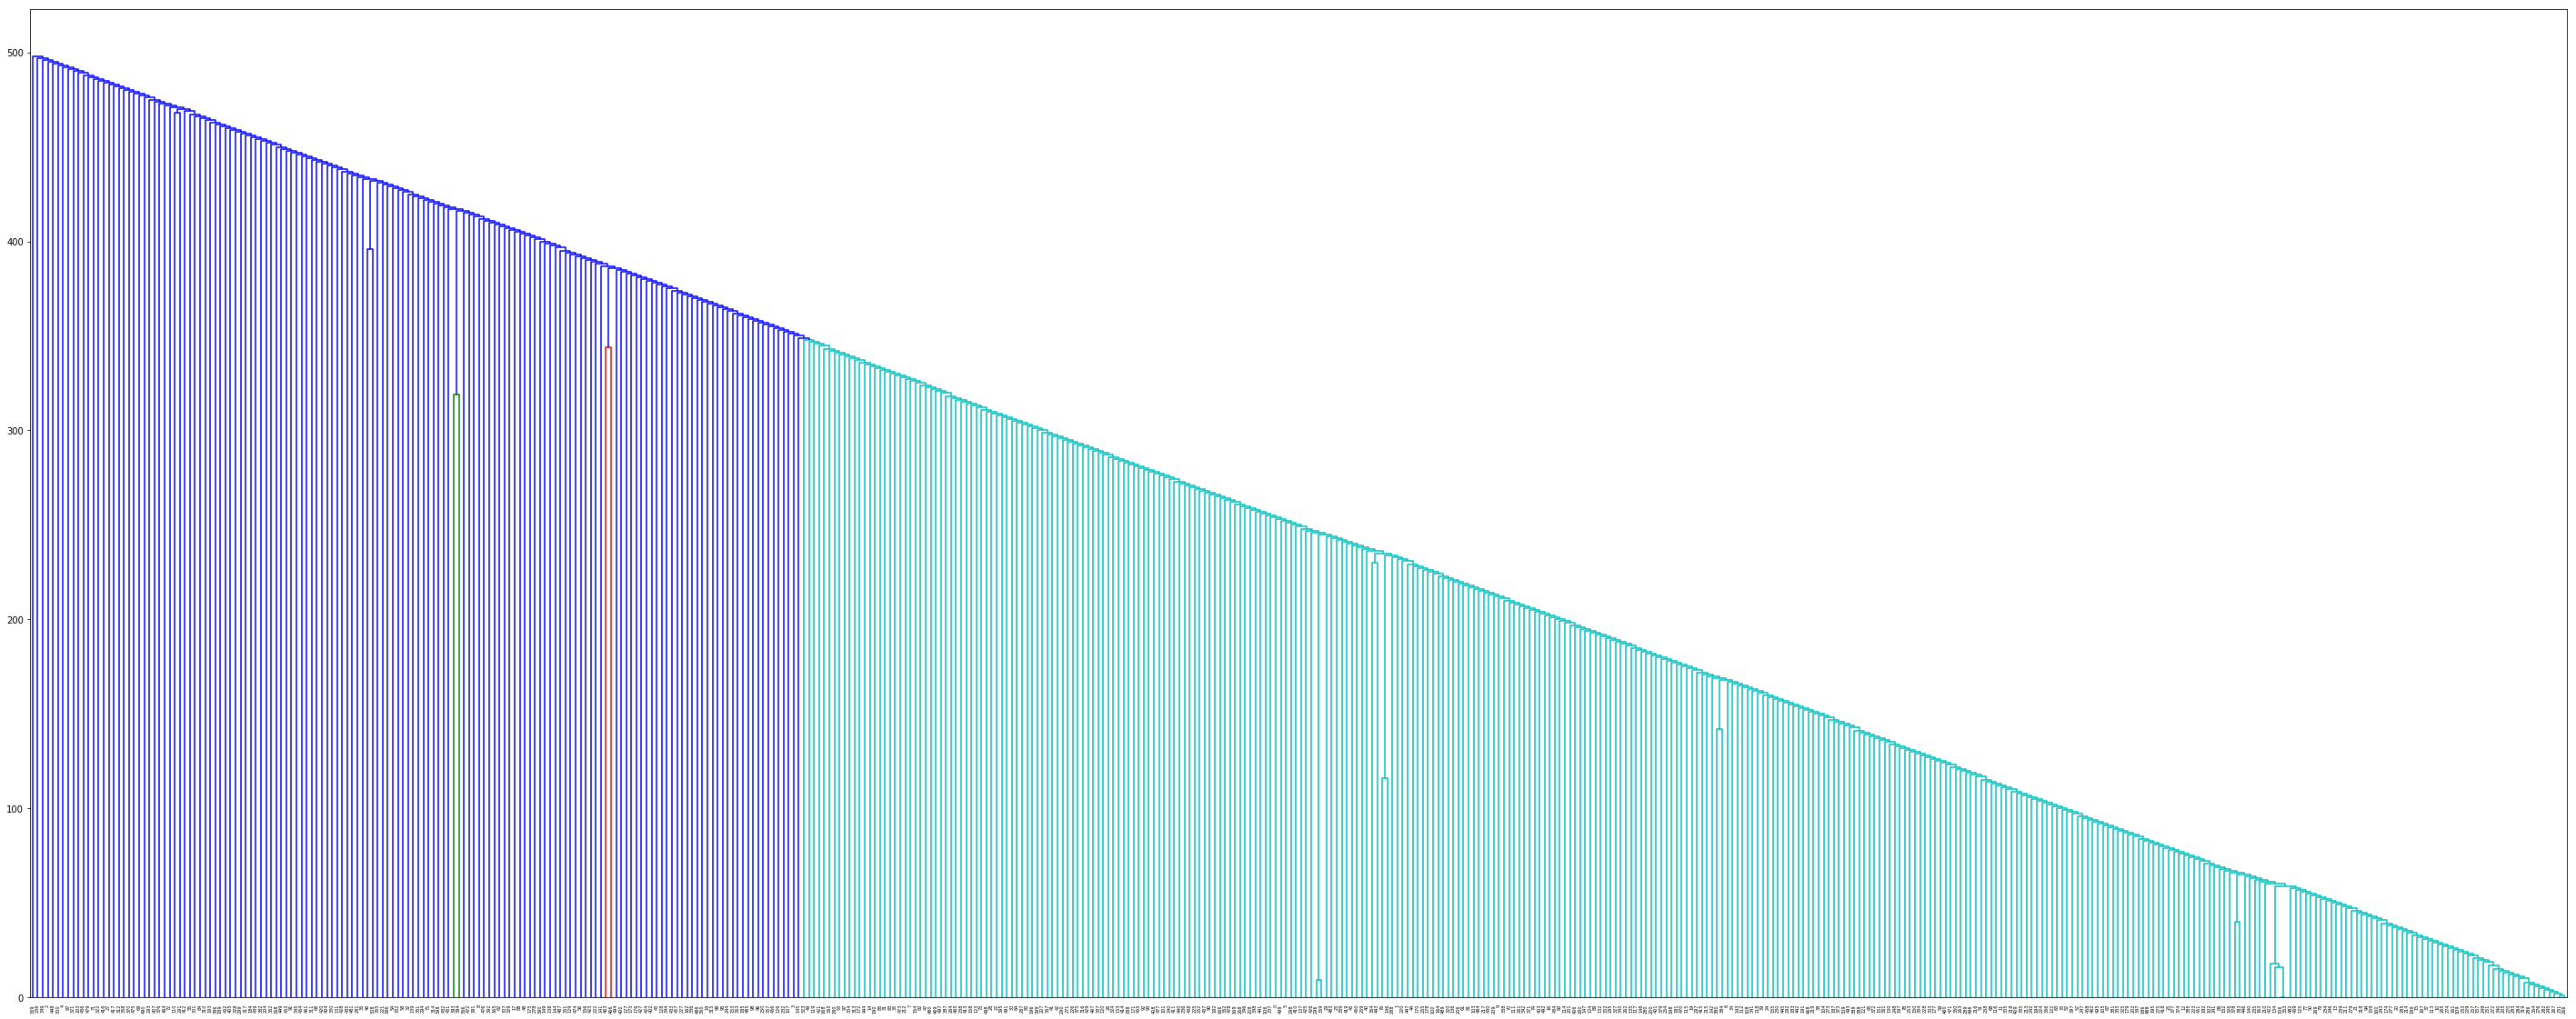

In [46]:
q3_c_model = q3_c(tfidf, 3)
q3_c_clusters = get_clusters(q3_c_model)
plot_dendrogram(q3_c_model)
print(q3_c_clusters)

Note: Double-click to zoom image

**(d) Agglomerative hierarchical clustering with complete linkage**

In [36]:
def q3_d(data, n_clusters):
    agg_comp = AgglomerativeClustering(n_clusters=n_clusters,
                                       affinity='euclidean',
                                       linkage='complete')
    agg_comp.fit_predict(data)
    return agg_comp

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

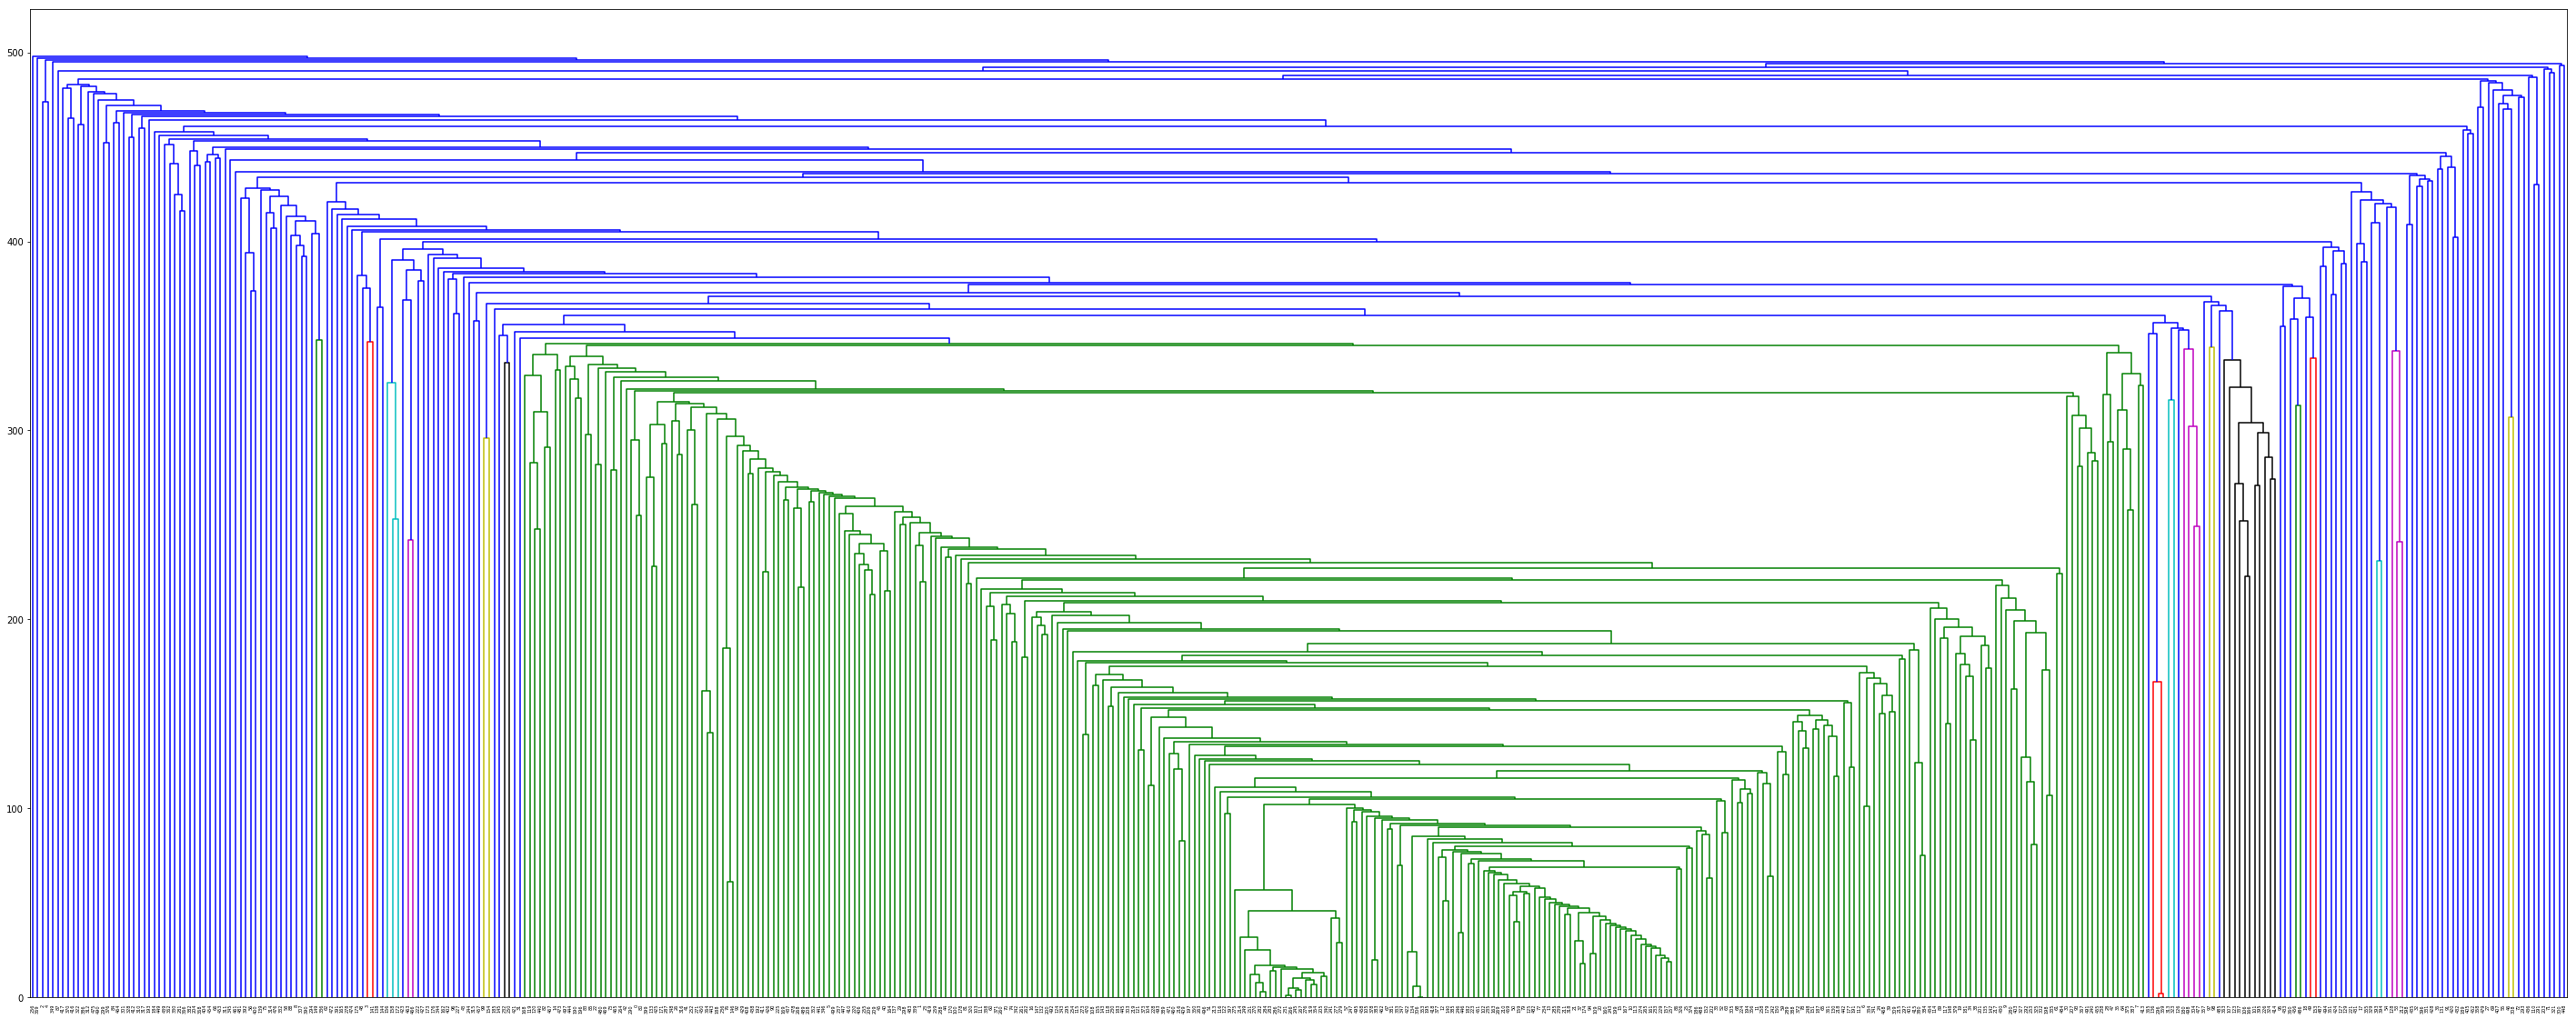

In [47]:
q3_d_model = q3_d(tfidf, 3)
q3_d_clusters = get_clusters(q3_d_model)
plot_dendrogram(q3_d_model)
print(q3_d_clusters)

**(e) Agglomerative hierarchical clustering with average linkage**

In [38]:
def q3_e(data, n_clusters):
    agg_avg = AgglomerativeClustering(n_clusters=n_clusters,
                                      affinity='euclidean',
                                      linkage='average')
    agg_avg.fit_predict(data)
    return agg_avg

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

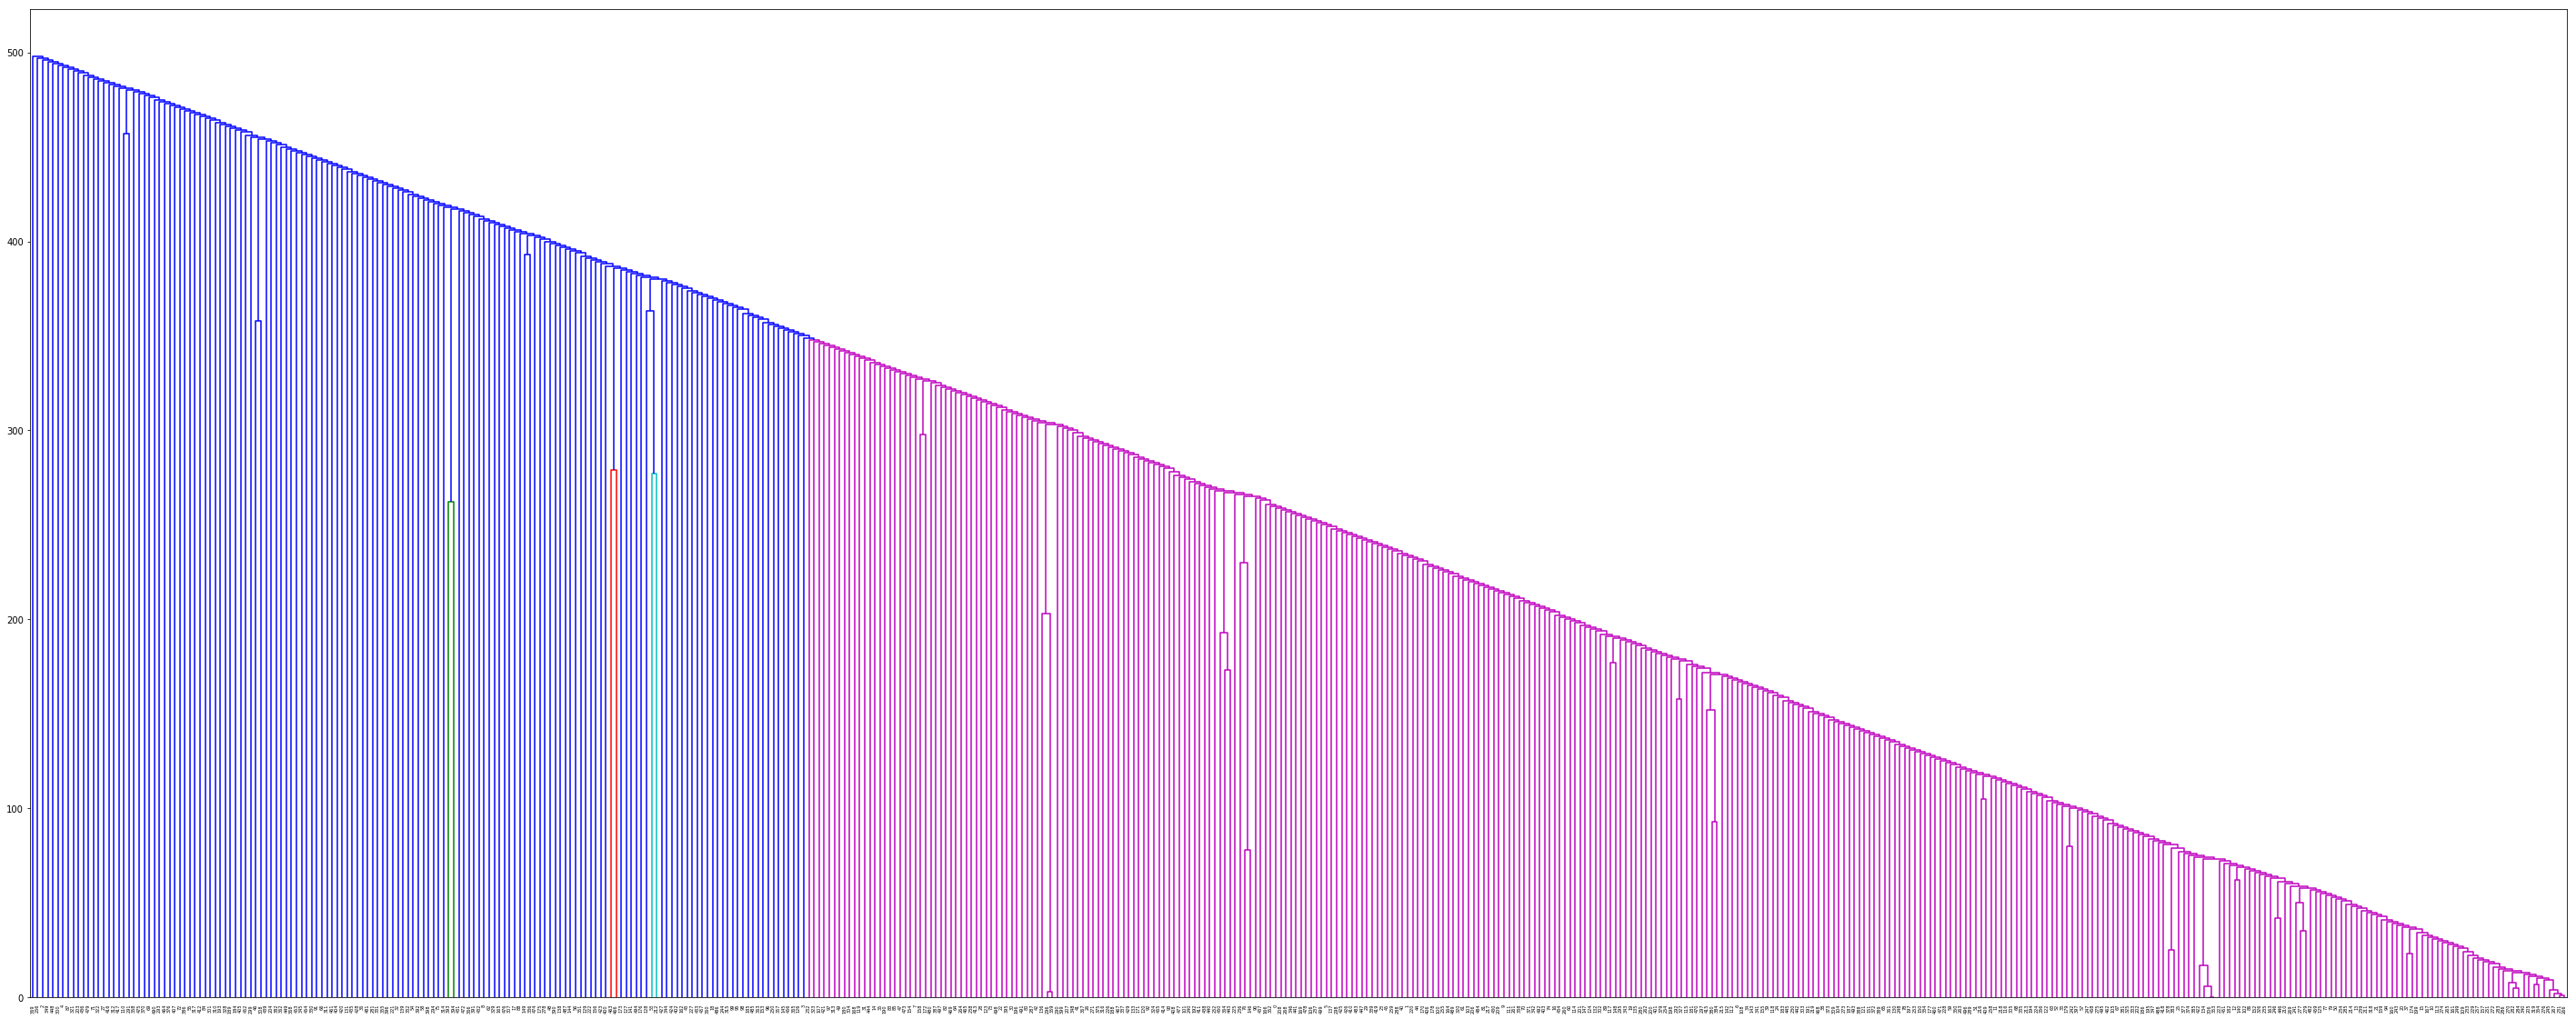

In [48]:
q3_e_model = q3_e(tfidf, 3)
q3_e_clusters = get_clusters(q3_e_model)
plot_dendrogram(q3_e_model)
print(q3_e_clusters)

**(f) Agglomerative hierarchical clustering with ward's method**

In [40]:
def q3_f(data, n_clusters):
    agg_ward = AgglomerativeClustering(n_clusters=n_clusters,
                                       affinity='euclidean',
                                       linkage='ward')
    agg_ward.fit_predict(data)
    return agg_ward

[1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 

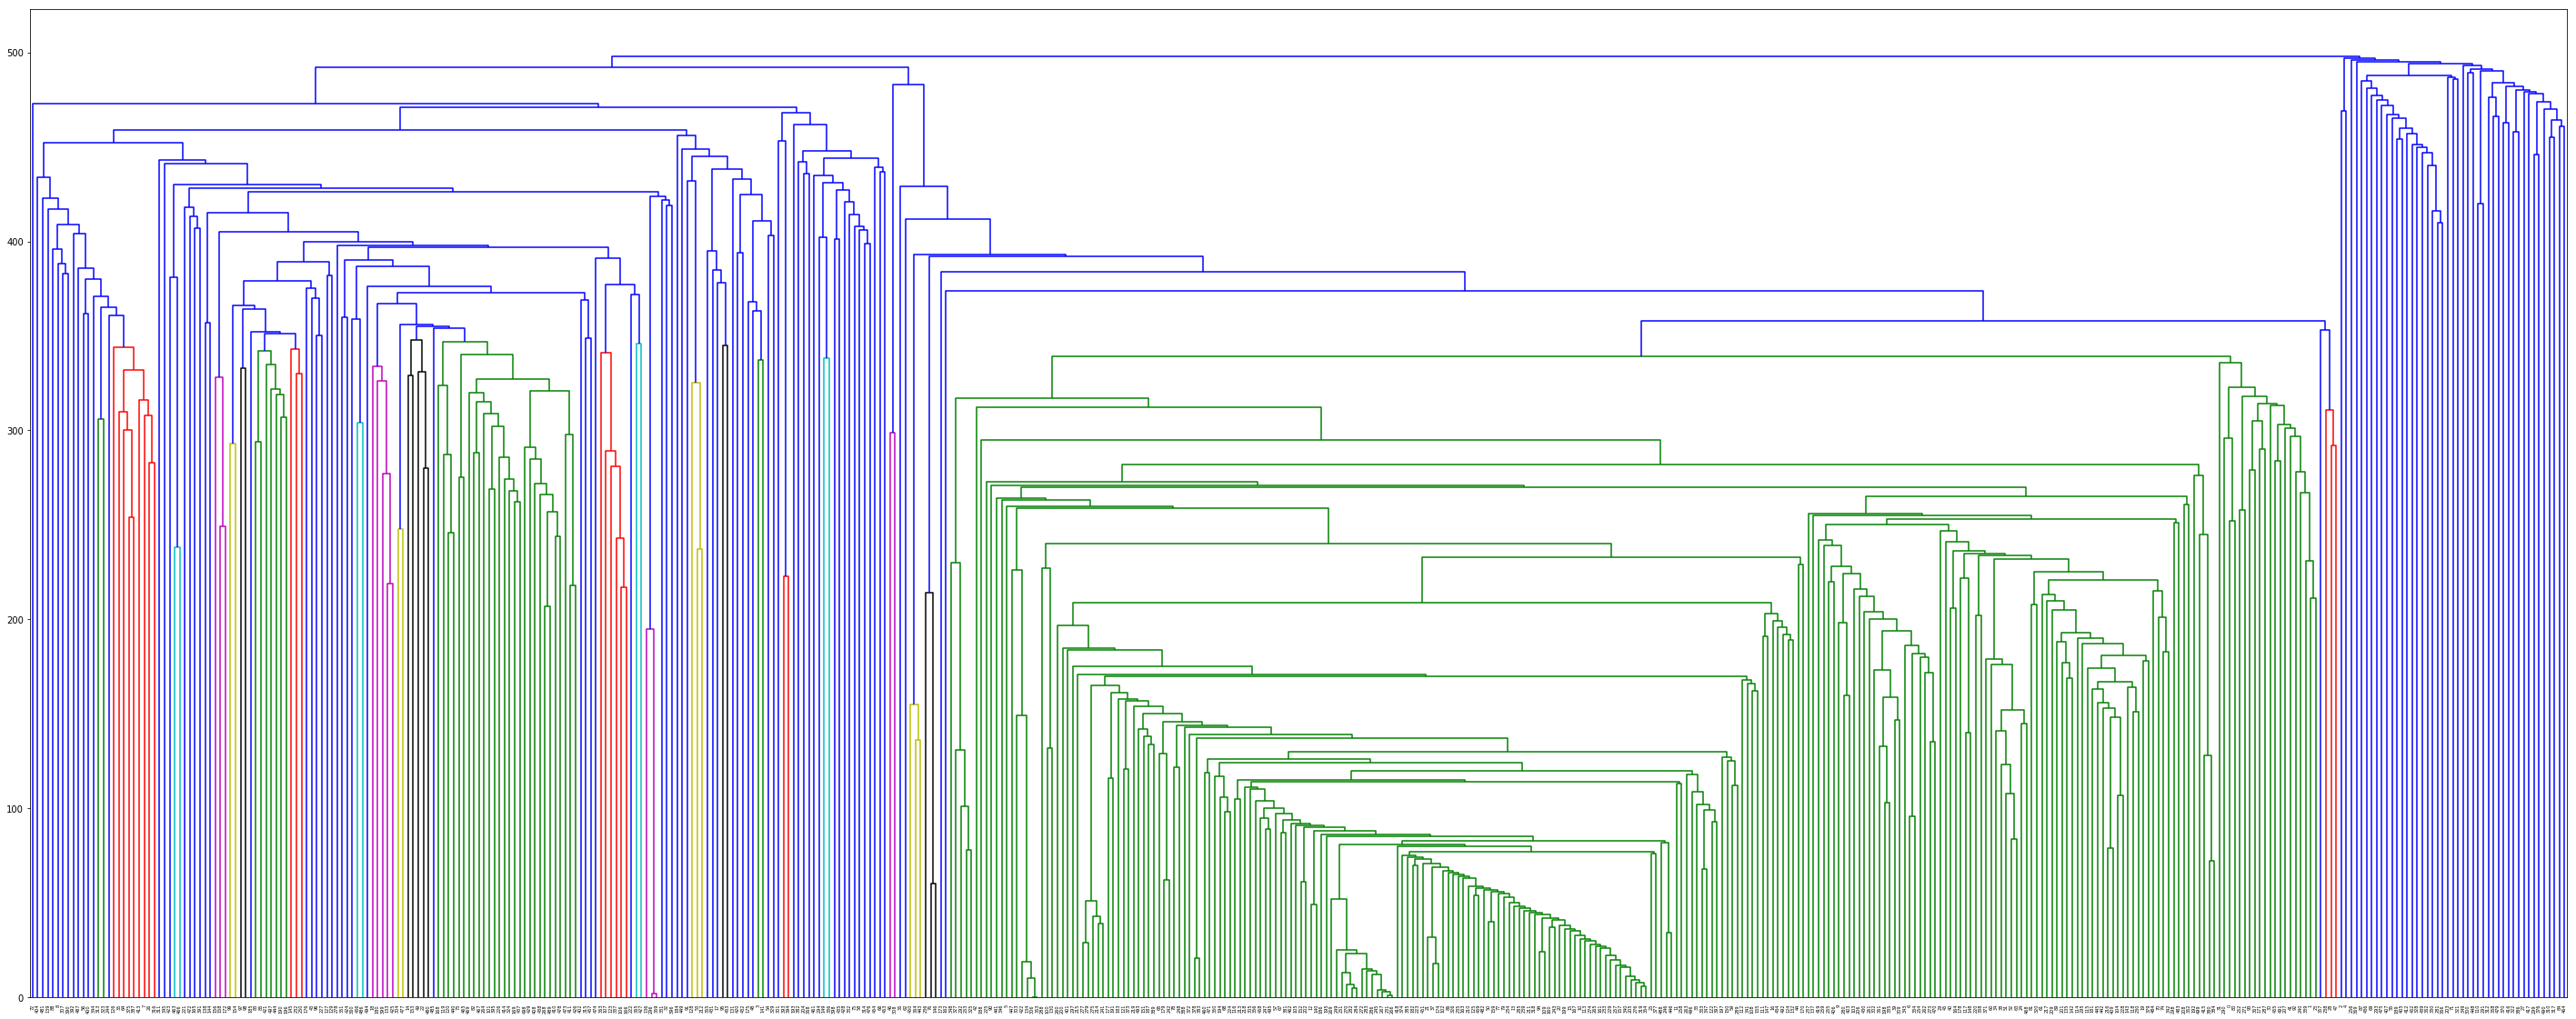

In [49]:
q3_f_model = q3_f(tfidf, 3)
q3_f_clusters = get_clusters(q3_f_model)
plot_dendrogram(q3_f_model)
print(q3_f_clusters)

## Task 4

#### (a) Trying out the different values of K

In [42]:
def plot_similarity(k_values, inter_similarities, intra_similarities):
    plt.plot(k_values, inter_similarities, marker='o')
    plt.plot(k_values, intra_similarities, marker='o')
    plt.legend(['Inter-Cluster Similarity', 'Intra-Cluster Similarity'], loc='upper left')
    plt.show()

In [43]:
def euclidean_distance(a, b):
    return np.linalg.norm(a-b)

In [81]:
def calculate_centers(model):
    cluster = get_clusters(model)
    n_clusters = len(set(cluster))
    centers = np.zeros([n_clusters,len(tfidf[0])])
    cluster_counts = np.zeros(n_clusters)
    
    for i in range(len(tfidf)):
        centers[cluster[i]] += np.asarray(tfidf[i])
        cluster_counts[cluster[i]] += 1
    for i in range(n_clusters):
        centers[i] /= cluster_counts[i]
    return centers

In [66]:
def calculate_inertia(model):
    cluster_centers = calculate_centers(model)
    inertia = 0
    for datapoint in tfidf:
        inertia += min(euclidean_distance(np.asarray(datapoint), cluster_center) for cluster_center in cluster_centers)
    return inertia

In [76]:
from itertools import combinations

def calculate_inter_similarity(model):
    # Inverse of average distance between cluster centers. More distance means less similarity.
    dists = []
    try:
        cluster_centers = model.cluster_centers_
    except AttributeError:
        cluster_centers = calculate_centers(model)
    for pair in combinations(cluster_centers, r=2):
        dists.append(euclidean_distance(*pair))
    return 1/np.mean(dists)

In [71]:
def calculate_intra_similarity(model):
    # Inverse of inertia. More distance means less similarity.
    # Inertia: Sum of distances of samples to their closest cluster center
    try:
        return 1/model.inertia_
    except AttributeError:
        return 1/calculate_inertia(model)


In [72]:
from sklearn.preprocessing import MinMaxScaler


def find_best_k(model_func, data, **kwargs):
    inter_similarities = np.empty(13)
    intra_similarities = np.empty(13)
    k_values = range(2, 15)
    for k in k_values:
        model = model_func(data, k, **kwargs)
        inter_similarities[k-2] = calculate_inter_similarity(model)
        intra_similarities[k-2] = calculate_intra_similarity(model)


    #  scaler = MinMaxScaler()
    inter_similarities = (inter_similarities - inter_similarities.min()) / (inter_similarities.max() - inter_similarities.min())
    intra_similarities = (intra_similarities - intra_similarities.min()) / (intra_similarities.max() - intra_similarities.min())
    # plot the similarities against K values
    plot_similarity(k_values, inter_similarities, intra_similarities)

#### (b)  We choose the optimum value of K to be in the range where the inter-cluster similarity is least and intra-cluster similarity is maximum. Also, we consider the point of elbow as the most optimal value for choosing K. 

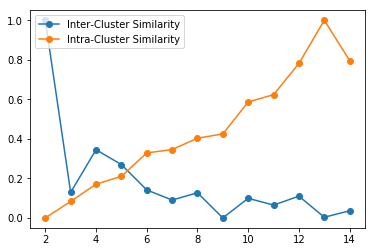

In [73]:
find_best_k(q3_a, tfidf)

Note: the similarities are scaled to [0,1]

Here K = 13 seems best as elbows are observed for both measures.

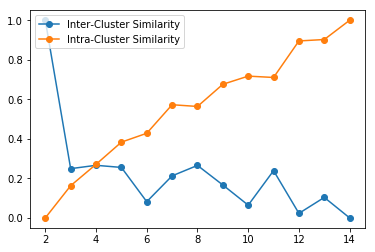

In [74]:
find_best_k(q3_b, tfidf)

Here K = 12 seems best as elbows are observed for both measures.

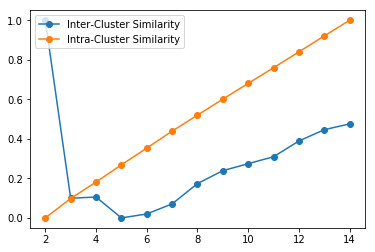

In [82]:
find_best_k(q3_c, tfidf)

Here K = 5 seems best as elbows are observed for both measures.

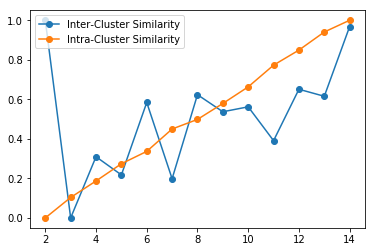

In [83]:
find_best_k(q3_d, tfidf)

Here K = 7 seems best as elbows are observed for both measures.

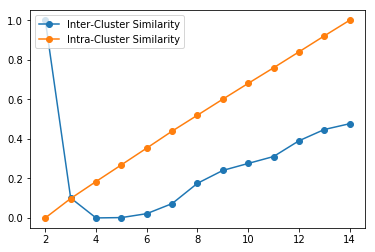

In [84]:
find_best_k(q3_e, tfidf)

Here K = 4 seems best as elbows are observed for both measures.

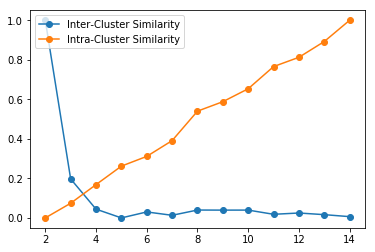

In [85]:
find_best_k(q3_f, tfidf)

Here K = 5 seems best as elbows are observed for both measures.

## Task 5

In [104]:
def nearest_center(query, model):
    try:
        cluster_centers = model.cluster_centers_
    except AttributeError:
        cluster_centers = calculate_centers(model)
    dists = [euclidean_distance(np.asarray(query), cluster_center) for cluster_center in cluster_centers]
    return dists.index(min(dists))

In [105]:
def cluster_documents(query, model):
    cluster = get_clusters(model)
    n_clusters = len(set(cluster))
    query_cluster = nearest_center(query, model) # Cluster that the query belongs to. Calculated by finding nearest cluster centroid
    
    cluster_doc=[]
    cluster_doclist=[]
    for i in range(len(tfidf)):
        if cluster[i]==query_cluster:
            cluster_doc.append(tfidf[i])
            cluster_doclist.append(doclist[i])
    
    docscores = []
    for j in range(len(cluster_doc)):
        docscores.append(sum(i[0] * i[1] for i in zip(query, cluster_doc[j])))
    return [x for _,x in sorted(zip(docscores, cluster_doclist), reverse=True)]


In [87]:
def evaluate_clustering(vq, model):
    for i in range(len(vq)):
        print('Query',querylist[i],':', simple_queries[i])
        predicted_documents = cluster_documents(vq[i], model)
        required_documents = required_results[querylist[i]]
        if len(required_documents) > 0:
            evaluate_results(required_documents, predicted_documents)
        else:
            print("\nThere is no overlap between required documents and sampled documents\n")

In [107]:
best_k_cluster_model = q3_a(tfidf, 12)

In [106]:
evaluate_clustering(vq2, best_k_cluster_model)

Query 706 : methods control type ii diabetes

k 	 Precision 	 Recall
5 	 0.60 		 0.75
10 	 0.40 		 1.00
15 	 0.27 		 1.00

Query 708 : sources slate stone decorative

k 	 Precision 	 Recall
5 	 0.80 		 1.00
10 	 0.40 		 1.00
15 	 0.27 		 1.00

Query 711 : security measures employed train stations due heightened security concerns

k 	 Precision 	 Recall
5 	 0.60 		 1.00
10 	 0.30 		 1.00
15 	 0.20 		 1.00

Query 716 : spammers arrested sued sending unsolicited e mail

k 	 Precision 	 Recall
5 	 0.40 		 1.00
10 	 0.20 		 1.00
15 	 0.13 		 1.00

Query 725 : cause lowered white blood cell count

k 	 Precision 	 Recall
5 	 0.40 		 1.00
10 	 0.20 		 1.00
15 	 0.13 		 1.00

Query 738 : examples anthrax hoaxes

k 	 Precision 	 Recall
5 	 0.40 		 1.00
10 	 0.20 		 1.00
15 	 0.13 		 1.00

Query 743 : regulations considerations concerning registering freighter country

k 	 Precision 	 Recall
5 	 0.20 		 0.20
10 	 0.20 		 0.40
15 	 0.20 		 0.60

Query 746 : jobs outsourced india

k 	 Precision 	 R

#### Comparison of precision and recall with Task 2

In [108]:
def compare_clustering(queries1, model1, queries2, model2):
    for i in range(len(queries1)):
        print('Query',querylist[i],':', simple_queries[i])
        print('TF-IDF Model')
        predicted_documents = rank_documents(queries1[i], model1)
        required_documents = required_results[querylist[i]]
        if len(required_documents) > 0:
            evaluate_results(required_documents, predicted_documents)
        else:
            print("\nThere is no overlap between required documents and sampled documents\n")
        print('TF-IDF Model with Clustering')
        predicted_documents = cluster_documents(queries2[i], model2)
        if len(required_documents) > 0:
            evaluate_results(required_documents, predicted_documents)
        else:
            print("\nThere is no overlap between required documents and sampled documents\n")

In [109]:
compare_clustering(vq2, tfidf, vq2, best_k_cluster_model)

Query 706 : methods control type ii diabetes
TF-IDF Model

k 	 Precision 	 Recall
5 	 0.60 		 0.75
10 	 0.40 		 1.00
15 	 0.27 		 1.00

TF-IDF Model with Clustering

k 	 Precision 	 Recall
5 	 0.60 		 0.75
10 	 0.40 		 1.00
15 	 0.27 		 1.00

Query 708 : sources slate stone decorative
TF-IDF Model

k 	 Precision 	 Recall
5 	 0.80 		 1.00
10 	 0.40 		 1.00
15 	 0.27 		 1.00

TF-IDF Model with Clustering

k 	 Precision 	 Recall
5 	 0.80 		 1.00
10 	 0.40 		 1.00
15 	 0.27 		 1.00

Query 711 : security measures employed train stations due heightened security concerns
TF-IDF Model

k 	 Precision 	 Recall
5 	 0.00 		 0.00
10 	 0.10 		 0.33
15 	 0.20 		 1.00

TF-IDF Model with Clustering

k 	 Precision 	 Recall
5 	 0.00 		 0.00
10 	 0.20 		 0.67
15 	 0.20 		 1.00

Query 716 : spammers arrested sued sending unsolicited e mail
TF-IDF Model

k 	 Precision 	 Recall
5 	 0.40 		 1.00
10 	 0.20 		 1.00
15 	 0.13 		 1.00

TF-IDF Model with Clustering

k 	 Precision 	 Recall
5 	 0.40 		 1.00
10 	 0.2

TF-IDF model performs slightly better with clustering